<h1>Jupyter notebooks for Digital Arts and Humanities research</h1>
<h2>An example using Titanic survivors list data and a neural network 🧊🛳️⚠️🛟</h2>

In this example we show two of the classic types of research we can do using DAH methods. First we dive into the data to look for close-up stories of real people. Then we zoom out to look for patterns in the big picture.

We begin with some simple set-up work. This imports the first library file we need to use. Later we import more library files to do different jobs for us.

Notice how we have text explanations (in "markup" using html), code blocks, and the output printed by running the code. The narrative of the notebook develops as we do things with code - one operation leading to the next. The research process involves deciding what to do with the data, interpreting the results, and then doing more data operations. We iterate through this process several times.

<h2>Getting set up to work with the data</h2>

This is based on the tutorial from https://code.visualstudio.com/docs/datascience/data-science-tutorial

The tutorial uses a database of information about survivors of the Titanic diaster, from Vanderbilt University's Department of Biostatistics. 

Import pandas, the python data handling and analysis library. Then read the csv file with our sample data into a pandas dataframe object, and print out a record to show the structure of the data. Learn about pandas at https://www.w3schools.com/python/pandas/default.asp

In [43]:
import pandas as pd # type: ignore
data = pd.read_csv('titanic3.csv')

This will have created a dataframe (a data structure defined by Pandas). We can browse this frame by opening it from the Jupyter variables panel at the bottom of the screen.

<h2>Diving into the data to unravel stories of real people in close-up <sup>*</sup></h2>

Let's now do a query, to get all of the people who paid more than £200 for their fare, which was an extraordinary amount of money in 1912 (<a href='https://www.in2013dollars.com/uk/inflation/1912?amount=200'>estimated to be £28,629 today</a>). Note this will return people who booked multiple cabins. This makes a dataframe called "wealthy". We are doing this to look for interesting individuals, so we can explore their stories.

Pandas has a simple syntax for querying. We can do more complicated things with it too, such as pivot tables and joins.

Rather than printing out all of the records here, open it through the Jupyter variables window.

<sup>*</sup> Diving 🤿 - unintended pun!

In [44]:
wealthy = data.query('fare > 200')

If we look at the dataframe this returns, we can see that passenger 49 had three of the most luxurious and expensive Parlour Suites. We can even find out about those suites and what they looked like using the Titanic wiki online https://titanic.fandom.com/wiki/Cabins_B-51/53/55 Here is a photo.

<img src='B51Adam.png' height='200'></img>

So, who was passenger 49?

In [45]:
passenger49 = data.query('index == 49')
name = passenger49['name']
print(name)

49    Cardeza, Mr. Thomas Drake Martinez
Name: name, dtype: object


Did anyone else travel with him, on the same ticket?

In [46]:
ticket = passenger49.ticket
ticketId = ticket.values[0]
qstring = "ticket == '" + ticketId + "'"
print(data.query(qstring))


     pclass  survived                                               name  \
49        1         1                 Cardeza, Mr. Thomas Drake Martinez   
50        1         1  Cardeza, Mrs. James Warburton Martinez (Charlo...   
183       1         1                             Lesurer, Mr. Gustave J   
302       1         1                                   Ward, Miss. Anna   

        sex   age  sibsp  parch    ticket      fare        cabin embarked  \
49     male  36.0      0      1  PC 17755  512.3292  B51 B53 B55        C   
50   female  58.0      0      1  PC 17755  512.3292  B51 B53 B55        C   
183    male  35.0      0      0  PC 17755  512.3292         B101        C   
302  female  35.0      0      0  PC 17755  512.3292          NaN        C   

    boat  body                                       home.dest  
49     3   NaN  Austria-Hungary / Germantown, Philadelphia, PA  
50     3   NaN                    Germantown, Philadelphia, PA  
183    3   NaN                        

We can now see that there were four passengers in this party. Searching online for info about Thomas Drake Martinez Cardeza reveals that:

"Mr Thomas Drake Martinez Cardeza, 36, was a wealthy banker from Germantown, PA. He was married to Mary B M Racine, born 27 March 1880 in Besançon, France, who had emigrated to America in 1883. He boarded the Titanic at Cherbourg with his mother Charlotte Cardeza and his manservant Gustave Lesueur. They occupied one of the two most luxurious suites on board (B51/3/5, ticket 17755, £512, 6s)." https://www.encyclopedia-titanica.org/titanic-survivor/thomas-cardeza.html

Notice there is a data anomoly - the database lists the cost as 512.3292 but it was actually paid for in the old pre-decimal British system, £512, 6s. Like most British people under the age of 60, i'm so glad we ditched that nonesense. But in DAH research, it is the kind of issue we need to be aware of. How does the decimal figure translate from the pre-decimal? Apparently there is an <a href='https://www.excelforum.com/excel-general/550314-pre-decimal-currency-calculations-in-excel.html'>Excel formula</a> for it. We could write some code in Python to convert the decimals in this database back to old money? Anyone want to volunteer to do that?

Anyhow, the Cardeza party all survived. They got into a lifeboat and was rescued. Women and children first? (the <a href='https://en.wikipedia.org/wiki/HMS_Birkenhead_(1845)#Birkenhead_drill'>Birkenhead drill</a>) Or was it rich people and their servants first?

That article doesn't mention Anna Ward. Who was she? As no info about her origin is recorded in the database, that suggests she was also a servant. Searching online shows that she was Charlotte's maid. There is a great story about what she did when they had to evacuate:

"On the night of the sinking Annie did not take time to dress properly and threw a fur coat over her nightgown. She stuffed some bits and pieces from a table into the pockets, which included salt and pepper cellars and some jewellery. When she offered the things that she had taken, to Mrs Cardeza her employer said that she could keep them. The Cardeza group was rescued in lifeboat 3." https://www.encyclopedia-titanica.org/titanic-survivor/annie-moore-ward.html

At this point we might want to go off and write a Hollywood blockbuster about the Cardeza party. I'm casting Jean Reno as Gustave, and Aura Garrido as Miss Ward.

But wait, we're DAH researchers! So we need to do more research first.

Next, let's look at the data in a "big data picture" perspective. We will need to use some maths, stats, and graphing libraries for this.

<h2>Zooming out to look for patterns in the data</h2>

Again we need to do some setting up so that we have the tools we need.

Importing NumPy, a Python library for working with arrays, doing stats and more. https://www.w3schools.com/python/numpy/default.asp 

In [47]:
import numpy as np # type: ignore

Importing Matplotlib https://www.w3schools.com/python/matplotlib_intro.asp
and Seaborn https://seaborn.pydata.org/ libraries for visualising the data. Note how we can give them short names to use in our code (sns and plt).

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

Now we do a bit of data cleaning. The source data has question marks in fields where no data is available. If we want these fields to be numerical, we can't have that. So we replace all of the question marks with NaN (not a number) which is recognised by the numpy library. Age and fare can then be converted to numerical fields (float64 as some data has decimal points, e.g. a fare of 212.50).

In [49]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

Now we can make some charts to look for patterns in the data.

<Axes: xlabel='survived', ylabel='fare'>

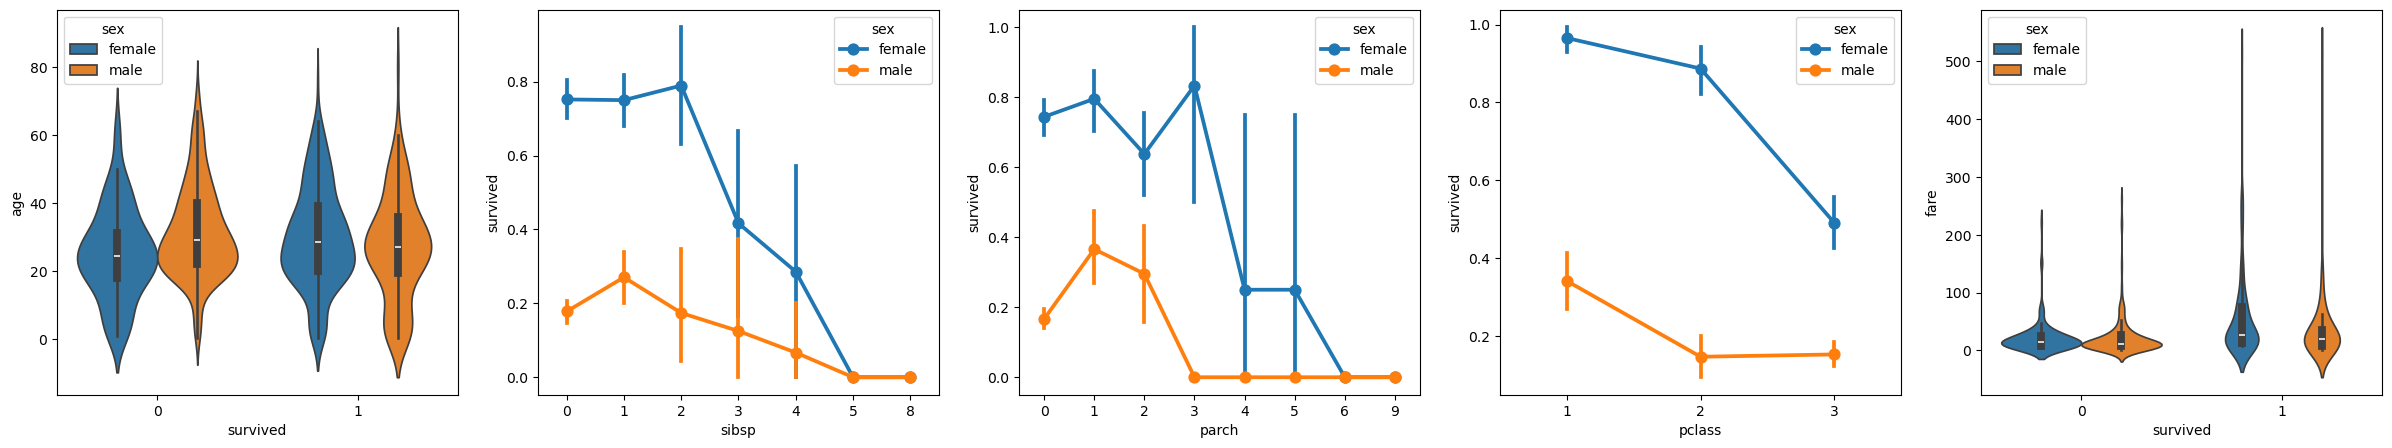

In [50]:
fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

Notice that if you hover over the top-right of the row of charts you get the option to copy them to your clipboard, open and view in a window, or save to the codespace. You can find the image file containing the charts in the file space for this repository (use the Explorer in VSCode on the left of the screen). As this is repository is set to be public, the image file has <a href='Notice that if you hover over the top-right of the row of charts you get the option to copy them to your clipboard, open and view in a window, or save to the codespace.'>its own url</a> that can be shared.

If we look at the survived/pclass chart we can see that females were more likely to survive regardless of class, but 1st and 2nd class female passengers had much greater chance of survival than those in 3rd class (who were well below decks - we could check that by querying the cabins they were in and looking at a plan of the ship). For male passengers, the picture was far more grim for 2nd and 3rd class passengers. 1st class males were still more likely to die than females of any class. So the Birkenhead protocol was applied (women and children first), but with an additional class bias that saved Thomas Cardeza and his servant Gustave.

Next we will look at some correlations. To do this with Pandas, some of the data needs to be converted from strings to integers. Don't worry about the warning that appears. This is telling us that the code we have used is an old approach, so in the future will need to be repplaced. We should sort that out now, but will carry on regardless.

In [51]:
data.replace({'male': 1, 'female': 0}, inplace=True)

/var/folders/xz/_9cg79yx7yb2yrtrht2mrl500000gn/T/ipykernel_31144/2851430834.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'male': 1, 'female': 0}, inplace=True)


We can, for example, find the correlations between survival and the other fields. 1 = maximum correlation, 0 = no correlation.

In [52]:
data.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


So sex was more important than class. We've already seen that in the charts.

Looking at the correlation results, you'll notice that some variables like gender have a fairly high correlation to survival, while others like relatives (sibsp = siblings or spouse, parch = parents or children) seem to have little correlation.

Let's hypothesize that sibsp and parch are related in how they affect survivability, and group them into a new column called "relatives" to see whether the combination of them has a higher correlation to survivability. To do this, you will check if for a given passenger, the number of sibsp and parch is greater than 0 and, if so, you can then say that they had a relative on board.

Use the following code to create a new variable and column in the dataset called relatives and check the correlation again.

In [53]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719
